                                        **Аналитический отчет**
О влиянии полов и возрастов на количество больничных дней
Гипотезы:
“Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще
женщин”.
"Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни
значимо чаще своих более молодых коллег".

Статистический анализ опровергает обе гипотезы. Можно представить две основные
причины расхождения между наблюдением компании и заключением данного анализа.
Первое, наблюдение компании и представленные гипотезы могли не учесть отличия в
рабочих условиях ее сотрудников. Если компания производственная, как в случае с
компанией Северсталь, то ее работники могут работать в разных природных условиях, а
именно, в офисе или непосредственно в грязном производстве, либо вблизи грязного
производства, как например, в случае с инженерами и некоторыми сотрудниками
бухгалтерской службы. Соответственно, в зависимости от рабочих условий, состояние
здоровья между этими сотрудниками могут существенно отличаться вне зависимости от
возраста или гендерной принадлежности.Таким образом, можно было бы объяснить
наблюдение компании относительно того, что мужчины чаще болеют, так как в основном,
мужчины задействованы в грязной промышленности, к пример в шахтах или на карьере.
Второе, можно также допустить, что, действительно, компания могла заметить более
частую заболеваемость среди мужчин и людей старше 35 именно среди офисных
работников. В таком случае, нужно выяснить отличаются ли мужчины от женщин или
люди старше 35 от своих более молодых коллег по роду деятельности. Если будет
установлена взаимосвязь между видом пола и служебными обязанностями или возрастом
и служебными обязанностями, то тогда нужно будет, вне зависимости от возраста или
пола, включить в группу риска сотрудников тех специальностей, среди которых была
замечена сравнительно высокая частота заболеваемости. Возможно, что служебные
обязанности и среди сотрудников, не связанных с грязным производством, могут
существенно отличаться в уровне их влияния на здоровье людей, в виде стресса и
ответственности.

Для более аккуратного статистического анализа для установления групп риска следует
собрать данные на род деятельности сотрудников и тип их заболеваний. В таком случае,
в дополнение появится возможность провести Multivariate and Multiple regression analyses.

** Гипотеза 1**.
 "Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин". 

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sb

df = pd.read_csv('../input/data1.csv', encoding="windows-1251")
# df.rename(columns = {'Количество больничных дней': 'Sick leaves', 'Возраст': 'Age', 'Пол': 'Gender' }, inplace = True)
df.head()

In [2]:
# Distribution of males and females differ from each other in the dataset
print(df['Пол'].value_counts())

In [3]:
# First off we need to conduct a simple Random Sampling to equalize amount of males and females in number. 
males = df[df['Пол']=='М'].sample(98)
females = df[df['Пол']=='Ж']
frames = [males, females]
people = pd.concat(frames)
print (people.shape)

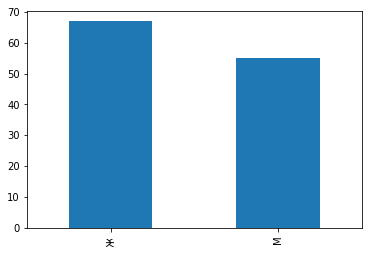

In [4]:
# Curiously enough, according to the following histogram, it is actually females who exceed males in the frequency of over 2 sick leaves.
# However, according to the T-test in the following cells, the histogram cannot be proved statistically.
data = people[people['Количество больничных дней']>2]
data['Пол'].value_counts().plot.bar()
print(data['Пол'].value_counts())

In [5]:
# We don`t observe any outliers
data.groupby(['Пол']).describe()

**According to Fisher`s exact test, given such a great p-value we cannot reject the null hypothesis

Hence, the hypothesis that Males more often have 2 Sick leaves than females cannot be supported.**

In [7]:
'''
H0: Males do not have 2 Sick leaves more often than females.
H1: Males more often have 2 Sick leaves than females.
'''
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[67, 55], [61, 43]])
pvalue

In [8]:
'''Alternative method using T-test for a new hypothesis.'''
people.groupby(['Пол']).describe()

In [9]:
males_days = males['Количество больничных дней']
females_days = females['Количество больничных дней']

In [10]:
'''We can`t reject null hypothesis of equal means, as T-test supports Fisher`s exact test findings in seeing no significant difference 
between male and female groups on the amount of 'Sick leaves'.'''
from scipy import stats
stats.ttest_ind(males_days, females_days)

**Гипотеза 2.**
"Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег".

In [12]:
# Number of people under 35 years of age
df[df['Возраст']<35]['Возраст'].count()

In [14]:
# Random Sampling to equalize amount of males and females in number. 
old = df[df['Возраст']>35].sample(46)
young = df[df['Возраст']<35]
values = [old, young]
results = pd.concat(values)

In [16]:
print(old[old['Количество больничных дней']>2]['Количество больничных дней'].count())
print(young[young['Количество больничных дней']>2]['Количество больничных дней'].count())

According to Fisher`s exact test, given such a high p-value, we cannot reject the null hypothesis.
Hence the alternative hyporthesis that employees over 35 years of age have a higher frequency of 
having more than 2 sick leaves than their younger colleagues can be rejected.

In [18]:
'''
H0: Employees over 35 years of age do not differ in the frequency of having more than 2 sick leaves than their younger colleagues. 
H1: Employees over 35 years of age have a higher frequency of having more than 2 sick leaves than their younger colleagues.
'''
odds, p_value = stats.fisher_exact([[26, 20], [31, 14]])
p_value